# 6.5: Unsupervised Machine Learning: Clustering

### I used the original dataset for this exercise - no varation of scaling data. Please take note of the Hierarchical Clustering I performed at the end of the exercise. P

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
%matplotlib inline

In [4]:
path = r'/Users/carolinazea/OneDrive/CareerFoundry/Achievement 6'

In [5]:
df = pd.read_csv(os.path.join(path,'files', '2021_NYC_Airbnb_Data.csv'))

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.shape

(6716, 24)

In [8]:
df.head()

,host_id,host_since,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,property_accommodates,property_bathrooms,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable
0,191091,8/4/10,Within A Few Hours,Superhost,Host has a Profile Picture,Host identity verified,Tribeca,Manhattan,40.72100,-74.00971,Entire rental unit,Entire home/apt,6,1 bath,250,30,90,Host has availability,298,13,1/4/20,12/29/20,4.85,Host not instant bookable
1,244071,9/24/10,Within An Hour,Superhost,Host has a Profile Picture,Host identity verified,Ditmars Steinway,Queens,40.77868,-73.90652,Entire rental unit,Entire home/apt,4,1 bath,140,4,1125,Host has availability,137,14,10/5/21,11/9/21,4.93,Host not instant bookable
2,503800,4/12/11,Within An Hour,Superhost,Host has a Profile Picture,Host identity verified,Crown Heights,Brooklyn,40.67654,-73.94629,Entire rental unit,Entire home/apt,4,1 bath,101,1,14,Host has availability,128,16,5/20/21,11/7/21,4.88,Host instant bookable
3,262812,10/15/10,Within A Day,Not a Superhost,Host has a Profile Picture,Host identity verified,Williamsburg,Brooklyn,40.71983,-73.95992,Entire rental unit,Entire home/apt,6,1 bath,250,30,90,Host has availability,77,57,5/5/19,12/11/19,4.45,Host not instant bookable
4,663384,6/4/11,Within A Day,Superhost,Host has a Profile Picture,Host identity verified,Park Slope,Brooklyn,40.67494,-73.97792,Entire residential home,Entire home/apt,5,2.5 baths,275,5,30,Host has availability,0,29,1/2/19,11/28/21,4.93,Host not instant bookable


In [9]:
df = df[['host_id','latitude', 'longitude', 'property_accommodates', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating']]

## 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.
## 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

In [10]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [12]:
score

[-1.4372844710165778e+20,
 -2.6500587073159692e+19,
 -1.0749418104955924e+19,
 -5.054062416462668e+18,
 -3.651119414572709e+18,
 -2.405378545148518e+18,
 -1.7523472204740157e+18,
 -1.3123972057301975e+18,
 -9.5212775429138e+17]

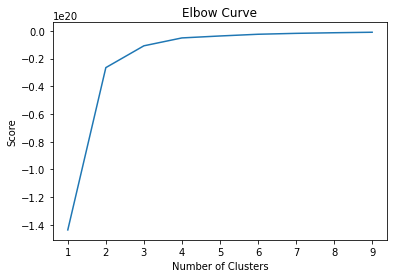

In [13]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The breaking curve is between 2 and 3 as elbow curve starts to become more linear after 3 clusters. 

## 5. Run the k-means algorithm.

In [14]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(df)

In [15]:
km

KMeans(init='random', n_clusters=3, random_state=0)

In [16]:
km.fit_predict(df)

array([1, 1, 1, ..., 0, 2, 1], dtype=int32)

## 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [17]:
df['clusters'] = km.fit_predict(df)

In [18]:
df.head(20)

,host_id,latitude,longitude,property_accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,clusters
0,191091,40.72100,-74.00971,6,250,30,90,298,13,4.85,1
1,244071,40.77868,-73.90652,4,140,4,1125,137,14,4.93,1
2,503800,40.67654,-73.94629,4,101,1,14,128,16,4.88,1
3,262812,40.71983,-73.95992,6,250,30,90,77,57,4.45,1
4,663384,40.67494,-73.97792,5,275,5,30,0,29,4.93,1
5,314941,40.72212,-73.99638,6,526,1,365,102,18,4.94,1
6,65610,40.72136,-73.95674,2,150,60,365,77,1,5.00,1
7,1434931,40.68321,-73.96741,3,135,30,120,318,11,4.90,1
8,1209728,40.75537,-73.77159,5,100,3,1125,332,1,5.00,1
9,1681546,40.71502,-73.99170,2,200,14,130,219,19,4.78,1


In [19]:
df['clusters'].value_counts()

1    3172
2    1777
0    1767
Name: clusters, dtype: int64

## 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

## Plot clusters for review_scores_rating and property_accommodates variables review_scores_rating

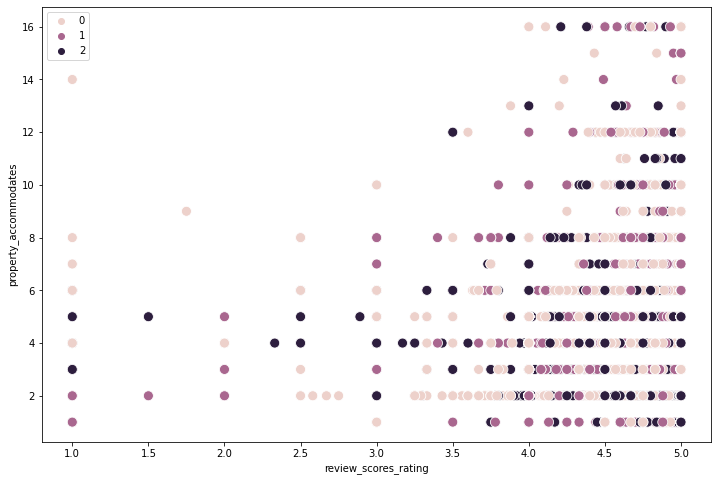

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_scores_rating'], y=df['property_accommodates'], hue=km.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('review_scores_rating') # Label x-axis.
plt.ylabel('property_accommodates') # Label y-axis.
plt.show()

### The total number of individuals in an Airbnb property does not have any affect on Airbnb host ratings. 

## Plot clusters for number_of_reviews and property_accommodates variables

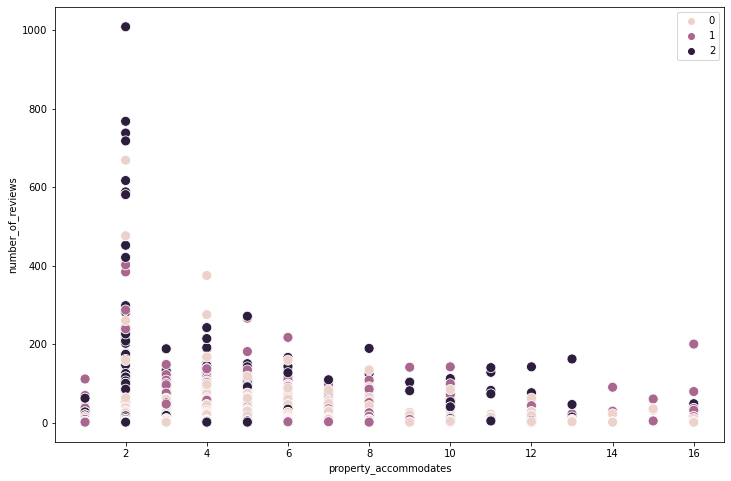

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['property_accommodates'], y=df['number_of_reviews'], hue=km.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('property_accommodates') # Label x-axis.
plt.ylabel('number_of_reviews') # Label y-axis.
plt.show()

### From the chart above, it seems an Airbnb property that hosts 2 individuals has a greater number of reviews. This howver does not determine whether these reviews are positive or negative. 

## Plot clusters for host_id and price variables

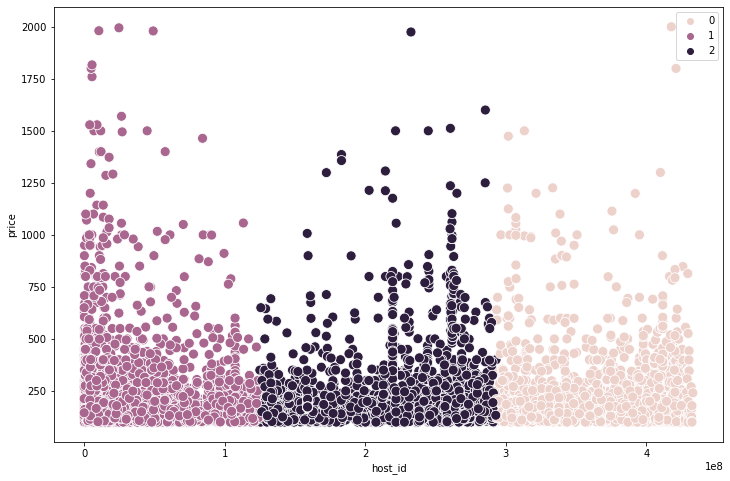

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['host_id'], y=df['price'], hue=km.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('host_id') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

### Infering the chart above, an Airbnb host ID and listing price's cluster results can originate from where the property is located. My hypothesis is expected that certain boroughs have a higher listing price. An Airbnb hosts' ID is not defined by rank so we cannot determine whether a higher host ID means anything significant. 

## Plot clusters for number_of_reviews and price variables

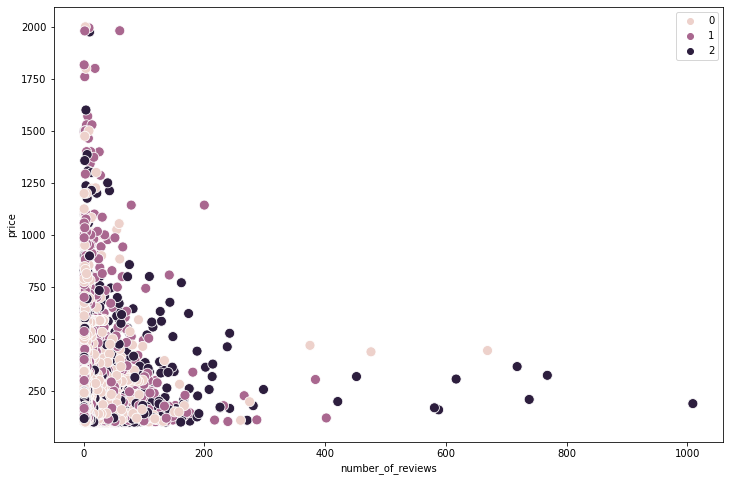

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_reviews'], y=df['price'], hue=km.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('number_of_reviews') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

### The number of reviews, specifically between 0 to 200 contain all variations of cluster, based on the plot above.

## Plot clusters for maximum_nights and price variables

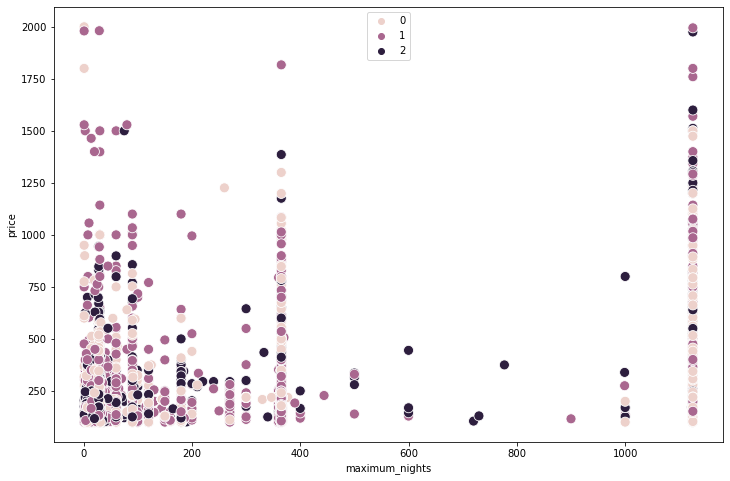

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['maximum_nights'], y=df['price'], hue=km.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('maximum_nights') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

### We can see a mixed variation of all cluster based values - more specifically, 0 and 1. 

## Plot clusters for minimum_nights and price variables

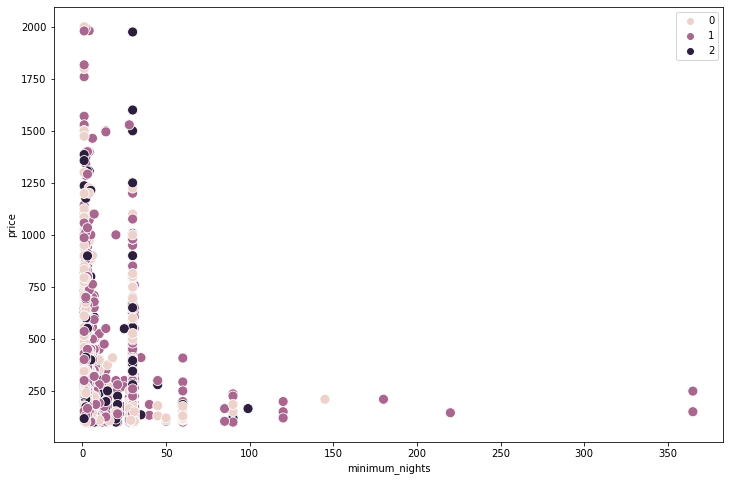

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['minimum_nights'], y=df['price'], hue=km.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('minimum_nights') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

### The minimum number of nights is mostly correlated between 0 to 50 and resulted in a mix of clusters of 0 and 1.

## Plot clusters for property_accommodates and price variables

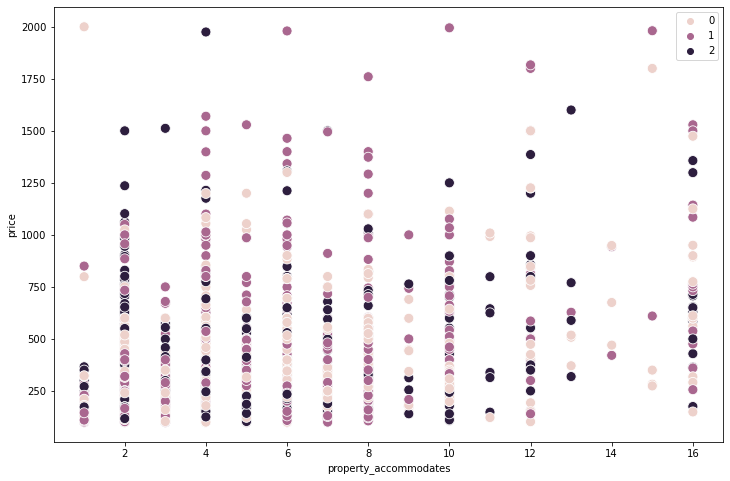

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['property_accommodates'], y=df['price'], hue=km.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('property_accommodates') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

### The cluster graph does not determine the price and how many individuals can be allowed in an Airbnb property.

### Plot clusters for 'availability_365' and 'price' variables

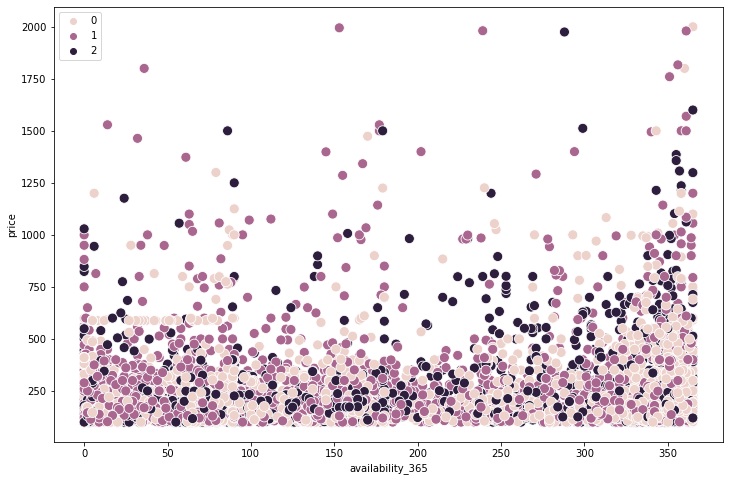

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['availability_365'], y=df['price'], hue=km.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('availability_365') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

### The graph above indicates that there is a cluster of availbility within a year and price. The cluster is mixed and is not really differentiated. 

## Plot clusters for 'review_scores_rating' and 'price' variables

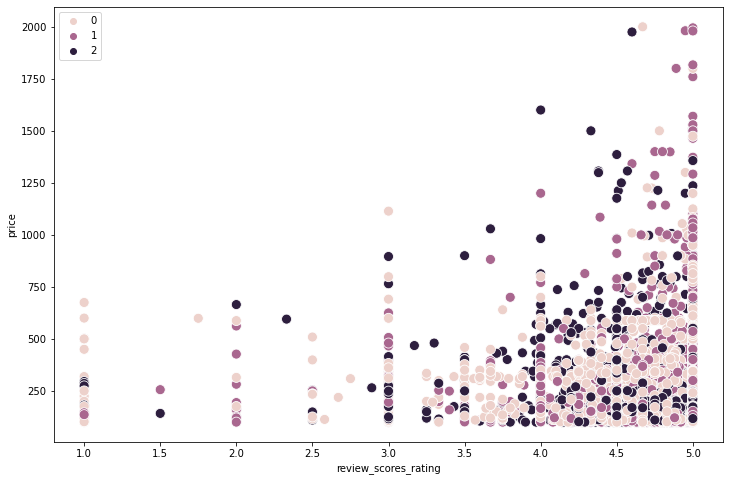

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_scores_rating'], y=df['price'], hue=km.labels_, s=100)

ax.grid(False) 
plt.xlabel('review_scores_rating') 
plt.ylabel('price') 
plt.show()

### An Airbnb host ratings and price is not really indicative of determining clusters. 

## 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

### At this point, I am going to do more plots to see if the variables in the dataset provides further results. 

## 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [29]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [30]:
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'],
                          'availability_365':['mean', 'median'],
                           'number_of_reviews':['mean', 'median'],
                          'review_scores_rating':['mean', 'median'],
                          'maximum_nights':['mean', 'median']})

price        minimum_nights        availability_365         \
                   mean median           mean median             mean median   
cluster                                                                        
dark purple  245.462577  179.0       8.655037    2.0       195.759707  171.0   
pink         266.716469  219.0       7.192417    2.0       201.366723  172.0   
purple       230.362547  175.0      13.804224    5.0       170.063997  153.0   

            number_of_reviews        review_scores_rating         \
                         mean median                 mean median   
cluster                                                            
dark purple         28.795723   11.0             4.651446   4.81   
pink                16.216186    7.0             4.601381   4.80   
purple              16.970681    6.0             4.767011   4.93   

            maximum_nights         
                      mean median  
cluster                            
dark purple     492.217220  340.0  
pink            554.349745  365.0  
purple          564.279634  365.0

## 10. Propose what these results could be useful for in future steps of an analytics pipeline.

# Hierarchical Clustering
### Source: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

In [43]:
df_2 = df[['host_id','latitude', 'longitude', 'property_accommodates', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating']]

In [45]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df_2)
data_scaled = pd.DataFrame(data_scaled, columns=df_2.columns)
data_scaled.head()

,host_id,latitude,longitude,property_accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating
0,0.999998,0.000213,-0.000387,0.000031,0.001308,0.000157,0.000471,0.001559,0.000068,0.000025
1,0.999989,0.000167,-0.000303,0.000016,0.000574,0.000016,0.004609,0.000561,0.000057,0.000020
2,1.000000,0.000081,-0.000147,0.000008,0.000200,0.000002,0.000028,0.000254,0.000032,0.000010
3,0.999999,0.000155,-0.000281,0.000023,0.000951,0.000114,0.000342,0.000293,0.000217,0.000017
4,1.000000,0.000061,-0.000112,0.000008,0.000415,0.000008,0.000045,0.000000,0.000044,0.000007


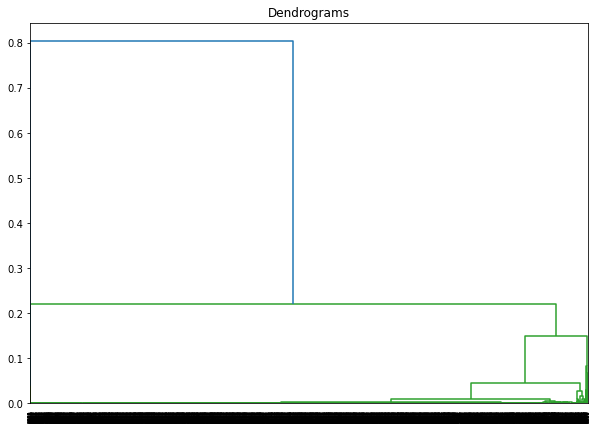

In [46]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0])

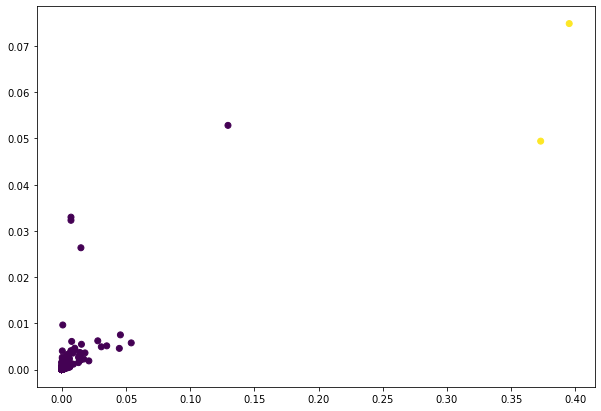

In [58]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['maximum_nights'], data_scaled['price'], c=cluster.labels_)

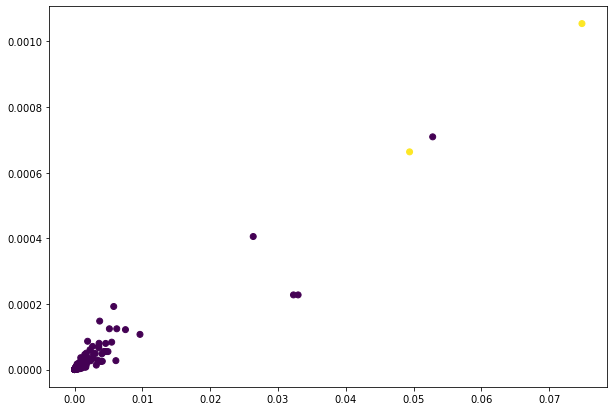

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['price'], data_scaled['property_accommodates'], c=cluster.labels_)

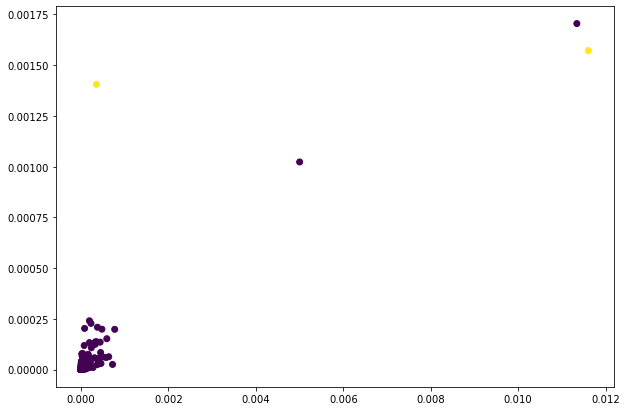

In [53]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['number_of_reviews'], data_scaled['review_scores_rating'], c=cluster.labels_)

### From the charts above, I cannot determine the visualization of two clusters. Although there are two different specs of color, both variables relay the same level of cluster information.